### STA160 Midterm Project
#### Group Members:
- Aris Briones
- Sophia Tierney
- HungHsu (Allen) Chen
- Amay Kharbanda


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
!pip install kmodes
from kmodes.kmodes import KModes

In [2]:
## comment out which way you don't use to upload the data
from google.colab import files
import io
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['Airbnb_NYC_2019.csv']))

# file = 'Airbnb_NYC_2019.csv'
# # load dataset into Pandas DataFrame
# df = pd.read_csv(file)

Saving Airbnb_NYC_2019.csv to Airbnb_NYC_2019.csv


## Exploratory Data Analysis

In [ ]:
# Show the first 5 observations of the data
df.head()

id  ... availability_365
0  2539  ...              365
1  2595  ...              355
2  3647  ...              365
3  3831  ...              194
4  5022  ...                0

[5 rows x 16 columns]

In [ ]:
# Dimensions of the dataset
df.shape

(48895, 16)

In [ ]:
# Checking the types of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

So we have data from $48895$ airbnb listings in 2019, 


Our given data is $X_1, ..., X_n \in \mathbb{R}^{d}$ where $n = 48895$ and $d = 16$
- n = rows = observations
- d = columns = features = dimension

Each observation (row): $X_{i}$ is 1 sample, or 1 airbnb listing
- is indexed by $i$ from $1, ...,n$ 

Each single observation $X_{i}$ is $d$ dimensions, 
- contains 16 features indexed by $j$ from $j = 1, ..., d$ where $d = 16$ 

Below, we can see the break down of the 3 room types: about 52% and 46% of the airbnb listings are the entire home or a private room, while .02% of the listings are a shared room. 

In [ ]:
df.loc[:, 'room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

We see that there are 7 integer, 3 float, and 6 object type variables.

In [ ]:
df.dtypes.value_counts()

int64      7
object     6
float64    3
dtype: int64

#### Check for Missing Values

- We see a large number of null values in last_review and reviews_per_month variables

- Plot shows the null value spread in the data

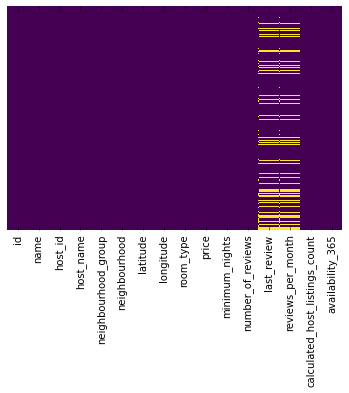

In [ ]:
# to check missing value
sns.heatmap(df.isnull(), cbar = False, yticklabels = False, cmap = 'viridis')

### Check for duplicated values
- We can see that there are no duplicated observations in the dataset

In [ ]:
# Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]
print('Number of duplicate rows: ', duplicate_rows_df.shape)

Number of duplicate rows:  (0, 16)


### Unique categories among categorical variables

In [ ]:
print('Neighbourhood Group')
print(df.neighbourhood_group.unique())
print('\n','Neighbourhood')
print(df.neighbourhood.unique())
print('\n','Room Type')
print(df.room_type.unique())
print('\n','Availability 365')
print(df.availability_365.unique())

Neighbourhood Group
['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']

 Neighbourhood
['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem'
 'Murray Hill' 'Bedford-Stuyvesant' "Hell's Kitchen" 'Upper West Side'
 'Chinatown' 'South Slope' 'West Village' 'Williamsburg' 'Fort Greene'
 'Chelsea' 'Crown Heights' 'Park Slope' 'Windsor Terrace' 'Inwood'
 'East Village' 'Greenpoint' 'Bushwick' 'Flatbush' 'Lower East Side'
 'Prospect-Lefferts Gardens' 'Long Island City' 'Kips Bay' 'SoHo'
 'Upper East Side' 'Prospect Heights' 'Washington Heights' 'Woodside'
 'Brooklyn Heights' 'Carroll Gardens' 'Gowanus' 'Flatlands' 'Cobble Hill'
 'Flushing' 'Boerum Hill' 'Sunnyside' 'DUMBO' 'St. George' 'Highbridge'
 'Financial District' 'Ridgewood' 'Morningside Heights' 'Jamaica'
 'Middle Village' 'NoHo' 'Ditmars Steinway' 'Flatiron District'
 'Roosevelt Island' 'Greenwich Village' 'Little Italy' 'East Flatbush'
 'Tompkinsville' 'Astoria' 'Clason Point' 'Eastchester' 'Kingsbridge'
 'Two Bridges

### Unique value counts among all variables in the data 

In [6]:
# Calculate number of unique values for each label: num_unique_labels
unique_vals = df.apply(pd.Series.nunique, axis='rows')
print(unique_vals)

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64


In [7]:
labels = list(unique_vals.index)

In [8]:
unique_vals.values

array([48895, 47905, 37457, 11452,     5,   221, 19048, 14718,     3,
         674,   109,   394,  1764,   937,    47,   366])

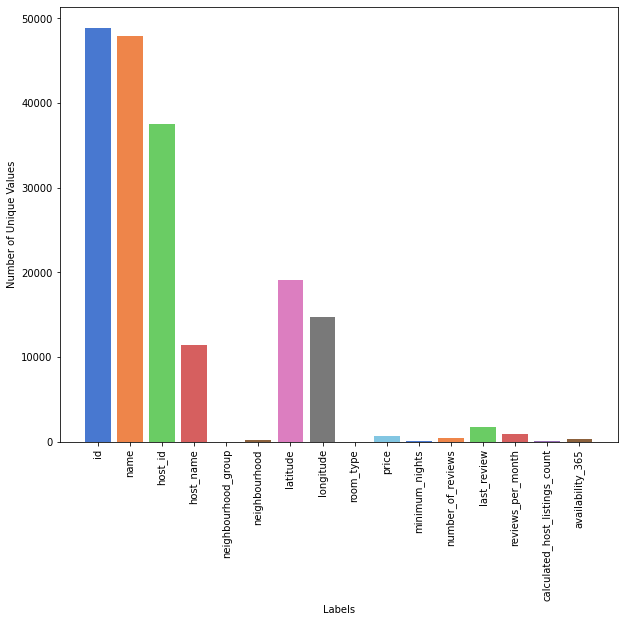

In [9]:
# Plot number of unique values for each label
plt.figure(figsize=(10, 8))
plt.bar(x = labels, height = unique_vals.values, color = sns.color_palette('muted'))
plt.xticks(unique_vals.index, labels, rotation = 'vertical')
# Label the axes
plt.xlabel('Labels')
plt.ylabel('Number of Unique Values')
plt.show()

Number of listings available per neighbourhood

In [ ]:
room_avail = df['availability_365'].value_counts()
nbhd_counts = df['neighbourhood'].value_counts()
nbhd_labels = nbhd_counts.index

In [ ]:
#room_avail
nbhd_counts

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Woodrow                  1
Richmondtown             1
Willowbrook              1
New Dorp                 1
Rossville                1
Name: neighbourhood, Length: 221, dtype: int64

### Summary statistics of our dataset
- Provided below is the count, mean, standard deviation, minimum and maximum values and the interquartile ranges of the numerical data
- Looking at the price variable, we can see that the mean is above the median. But we also see that the minimum price is 0 indicating 'free' housing.

In [ ]:
df.describe().T

count  ...           max
id                              48895.0  ...  3.648724e+07
host_id                         48895.0  ...  2.743213e+08
latitude                        48895.0  ...  4.091306e+01
longitude                       48895.0  ... -7.371299e+01
price                           48895.0  ...  1.000000e+04
minimum_nights                  48895.0  ...  1.250000e+03
number_of_reviews               48895.0  ...  6.290000e+02
reviews_per_month               38843.0  ...  5.850000e+01
calculated_host_listings_count  48895.0  ...  3.270000e+02
availability_365                48895.0  ...  3.650000e+02

[10 rows x 8 columns]

In [11]:
len(df[df.price == 0])

11

#### Check which observations correspond to the price of 0

- So, there are 11 observations that have a price of 0. This is most likely an error and these places are perhaps 'NA' values that were inputted as 0's.

#### Highighting some inconsistencies in host names.

In [10]:
# Highighting some inconsistencies in host names.

# Filling in "None" in place of NA values

df[["name", "host_name"]] = df[["name", "host_name"]].fillna("None")

print("There are " + str(len(df[df["host_name"]=="None"]))
      + " unindentifiable hosts and " + str(len(df.host_id.unique()))
      + " unique identifiable ones")

There are 21 unindentifiable hosts and 37457 unique identifiable ones


#### Pie chart representing the proportion of listings per neighbourhood group

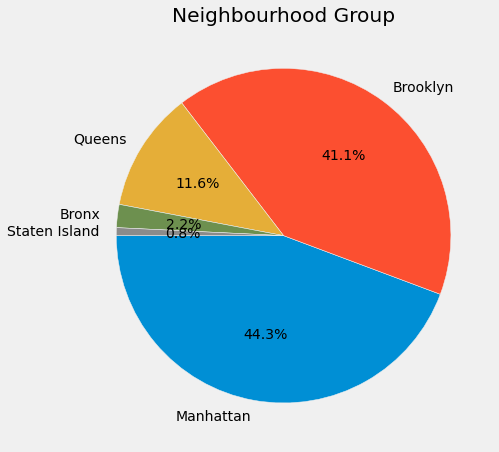

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group")
g = plt.pie(df.neighbourhood_group.value_counts(), 
            labels=df.neighbourhood_group.value_counts().index,
            autopct='%1.1f%%',
            startangle=180)
plt.show()

### Scatter plot Map of New York highlighting the Neighbourhood groups as Latitude and Longitude

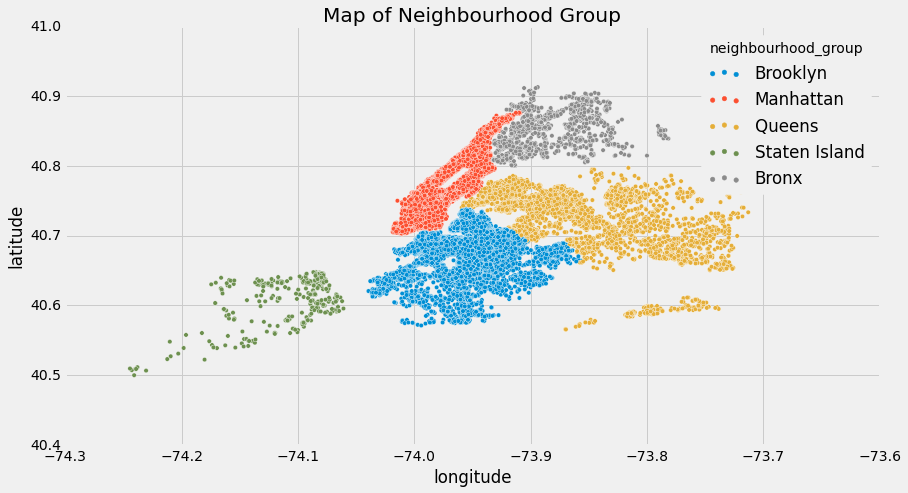

In [ ]:
plt.figure(figsize=(13,7))
plt.title("Map of Neighbourhood Group")
sns.scatterplot(df.longitude, df.latitude, hue = df.neighbourhood_group)
plt.ioff()
plt.show()

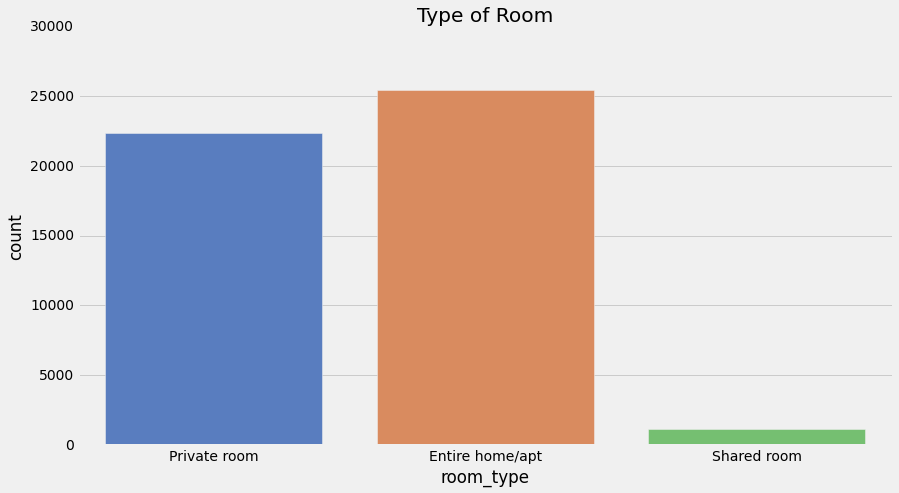

In [ ]:
# Counts of each room type
plt.figure(figsize=(13,7))
plt.title("Type of Room")
sns.countplot(df.room_type, palette="muted")
fig = plt.gcf()
plt.show()

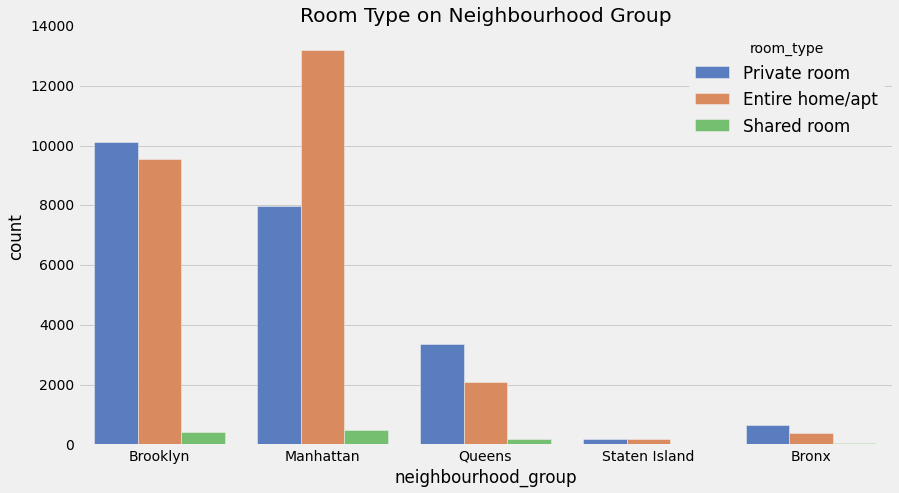

In [ ]:
# Count of room type per neighbourhood group
plt.figure(figsize=(13,7))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(df.neighbourhood_group,hue=df.room_type, palette="muted")
plt.show()

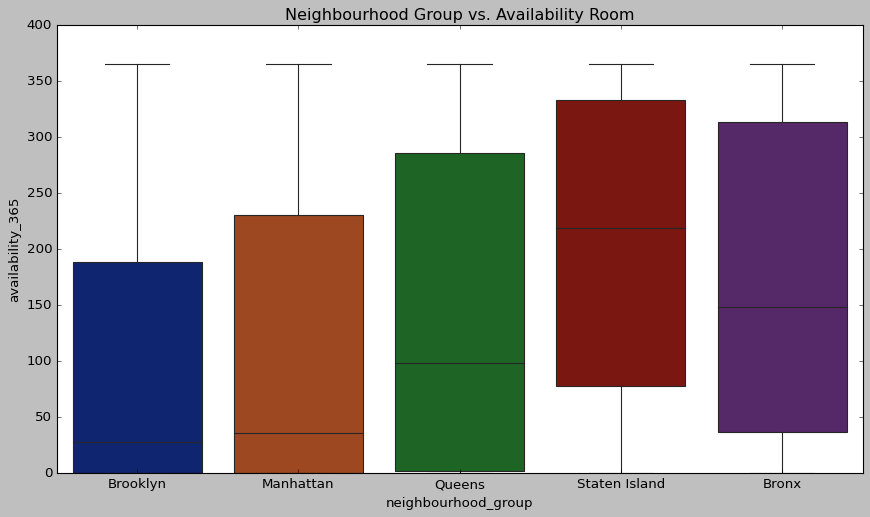

In [ ]:
# Boxplot of availability 365 with neighbourhood group
plt.style.use('classic')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group vs. Availability Room")
sns.boxplot(data=df, x='neighbourhood_group',y='availability_365',palette="dark")
plt.show()

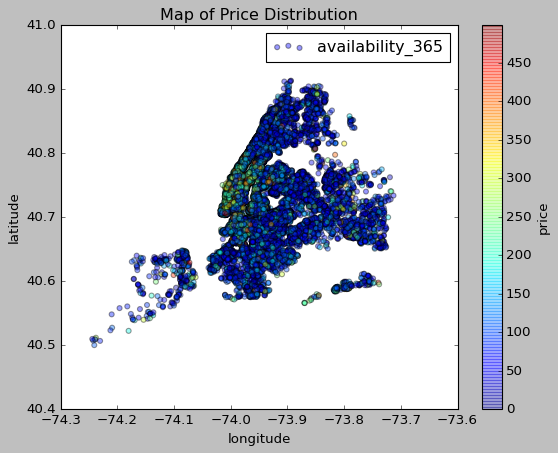

In [ ]:
# Map of price distribution in New York with price range heat value
df[df.price<500].plot(kind = 'scatter', x = 'longitude', y = 'latitude',
                         label = 'availability_365', c = 'price', cmap = plt.get_cmap('jet'), colorbar = True, alpha = 0.4)
plt.title("Map of Price Distribution")
plt.legend()
plt.show()

#### Here we can see that there are three outliers in the top part of the graph

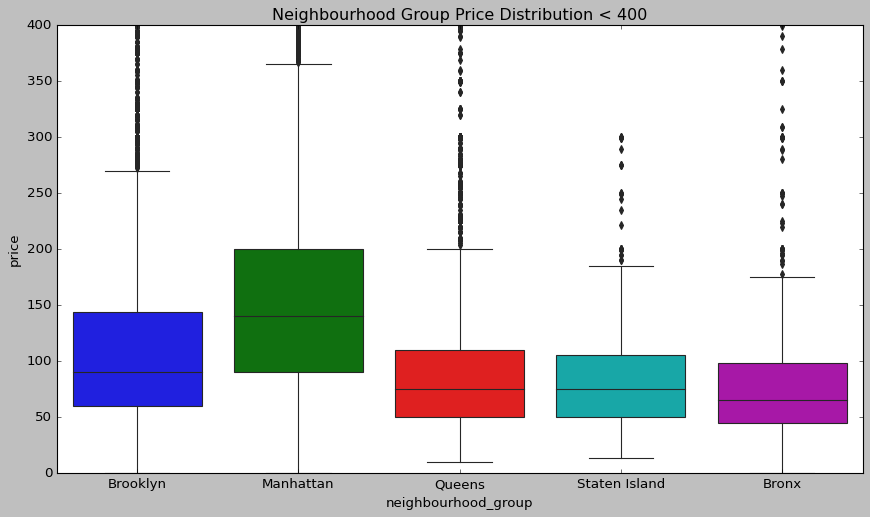

In [12]:
plt.style.use('classic')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group Price Distribution < 400")
sns.boxplot(y="price",x ='neighbourhood_group' ,data = df[df.price<400])
plt.show()

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

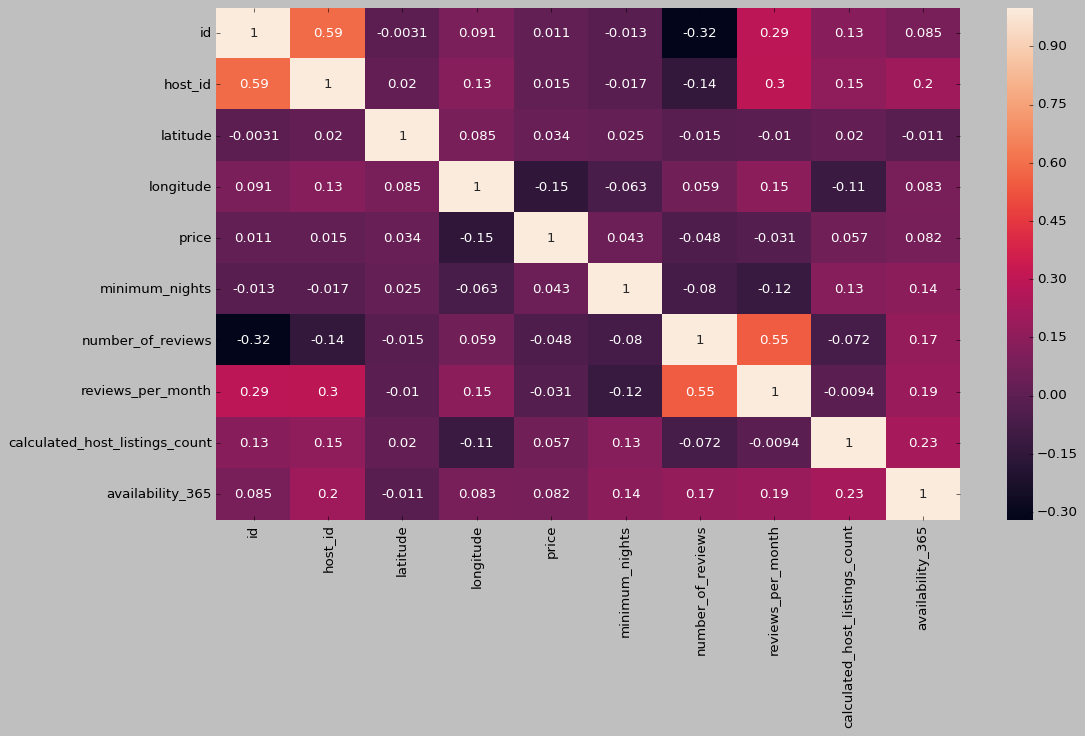

In [ ]:
corr = df.corr(method = 'pearson')
plt.figure(figsize = (15,8))
sns.heatmap(corr, annot = True)
df.columns

In [ ]:
## Average price per night per neighbourhood group
df['neighbourhood_group'].value_counts()
ng_price = df.groupby("neighbourhood_group")["price"].mean()
print(ng_price)

neighbourhood_group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64


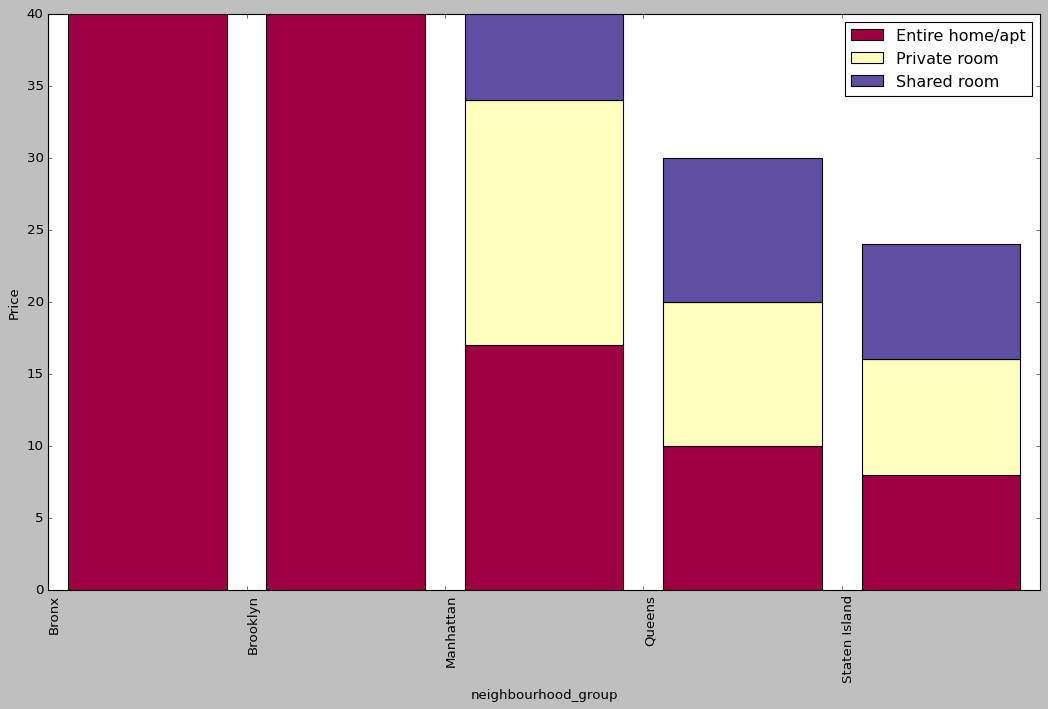

In [ ]:
x_var = 'neighbourhood_group'
groupby_var = 'room_type'

df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df['price'].values.tolist() for i in df_agg]

plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i / float(len(vals) - 1 )) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, df[x_var].unique().__len__(), stacked = True, density = False, color = colors[:len(vals)])

plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.xlabel(x_var)
plt.ylabel("Price")
plt.ylim(0, 40)
plt.xticks(ticks = bins, labels = np.unique(df[x_var]).tolist(), rotation = 90, horizontalalignment = 'left')
plt.show()

In [ ]:
## Analysis of continous variables
def findoutliers(column):
    outliers=[]
    Q1=column.quantile(.25)
    Q3=column.quantile(.75)
    IQR=Q3-Q1
    lower_limit=Q1-(1.5*IQR)
    upper_limit=Q3+(1.5*IQR)
    for out1 in column:
        if out1>upper_limit or out1 <lower_limit:
            outliers.append(out1)
            
    return np.array(outliers)  

len(findoutliers(df.price))

2972

count of outlier  2972
Mean  152.7206871868289
Median  106.0
Missing values 0
% of Missing values 0.0


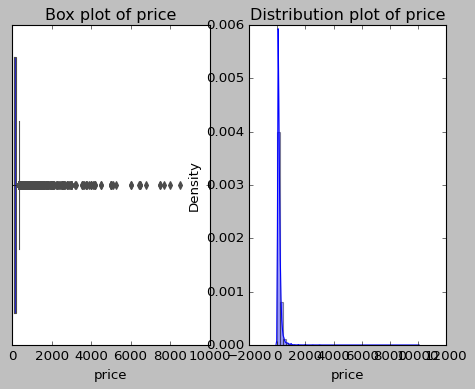

In [ ]:
def plotchart(col):
    fix, (ax1,ax2) = plt.subplots(1,2,figsize=(7,5))
    sns.boxplot(col, orient='v',ax=ax1)
    ax1.set_ylabel=col.name
    ax1.set_title('Box plot of {}'.format(col.name))
    sns.distplot(col, ax=ax2) 
    ax2.set_title('Distribution plot of {}'.format(col.name))
    
def analysis_column(col):
    print('count of outlier ', len(findoutliers(col)))
    print('Mean ',format(col.mean()))
    print('Median ',format(col.median()))
    print('Missing values',format(col.isnull().sum()))
    print('% of Missing values',format(round(100*(col.isnull().sum()/len(col)),2)))
    
    plotchart(col)
    
analysis_column(df.price)

In [ ]:
df.select_dtypes(['object'])

name  ... last_review
0                     Clean & quiet apt home by the park  ...  2018-10-19
1                                  Skylit Midtown Castle  ...  2019-05-21
2                    THE VILLAGE OF HARLEM....NEW YORK !  ...         NaN
3                        Cozy Entire Floor of Brownstone  ...  2019-07-05
4       Entire Apt: Spacious Studio/Loft by central park  ...  2018-11-19
...                                                  ...  ...         ...
48890    Charming one bedroom - newly renovated rowhouse  ...         NaN
48891      Affordable room in Bushwick/East Williamsburg  ...         NaN
48892            Sunny Studio at Historical Neighborhood  ...         NaN
48893               43rd St. Time Square-cozy single bed  ...         NaN
48894  Trendy duplex in the very heart of Hell's Kitchen  ...         NaN

[48895 rows x 6 columns]

In [ ]:
df_clean = df.copy()
df_clean.drop(['id', 'host_id', 'host_name', 'last_review', 'reviews_per_month'], axis = 1, inplace = True)

In [ ]:
#df.isna()
df_clean.isna().any(axis = 0) # tells us which features the na values belong to 
df_clean.isna().any(axis = 1) # tells us the index the na values belong to 

df_clean.isna().sum(axis = 0)
#df_clean.isna().sum(axis = 1)

## we have 10052 NA observations in last_review and reviews_per_month variables

name                              0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
df_clean.shape

(48895, 11)

## Bubble Plot of the average price per neighbourhood: size of the bubbles indicates the number of airbnb listings per neighbourhood

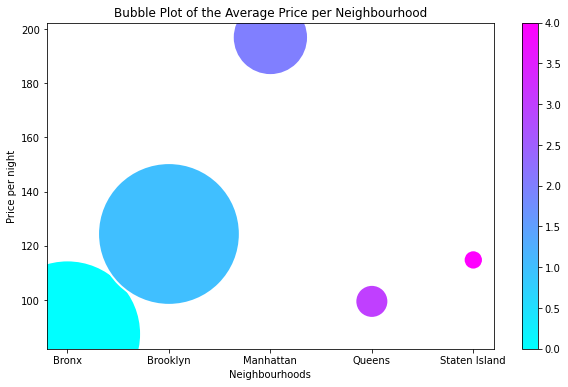

In [ ]:
df_means_per_group =  df_clean.groupby(['neighbourhood_group']).agg(
    {'price': ['mean']
    }
).reset_index() # means per neighbourhood group 

df_means_per_group['neighbourhood_group'] = pd.Categorical(df_means_per_group['neighbourhood_group'])
group_names = pd.Categorical(df_means_per_group['neighbourhood_group']).copy()
cat_codes = group_names.codes
cat_codes
avg_price_per_group = df_means_per_group[['price']].copy() # average price for each nbhd group


plt.figure(figsize = (10, 6))
plt.scatter(
    x = df_means_per_group['neighbourhood_group'], 
    y = avg_price_per_group, 
    s = df_clean['neighbourhood_group'].value_counts(), 
    c = cat_codes, 
    cmap = 'cool', 
    edgecolors = "white", 
    linewidth = 2);

plt.title("Bubble Plot of the Average Price per Neighbourhood")
plt.xlabel("Neighbourhoods")
plt.ylabel("Price per night");
plt.colorbar()
plt.show()

In [ ]:
df_categorical = df_clean.copy()
df_categorical.drop(['name'], axis = 1, inplace = True)
df_categorical.head()

neighbourhood_group  ... availability_365
0            Brooklyn  ...              365
1           Manhattan  ...              355
2           Manhattan  ...              365
3            Brooklyn  ...              194
4           Manhattan  ...                0

[5 rows x 10 columns]

In [ ]:
cat_features = ['neighbourhood_group','neighbourhood', 'room_type']
#df['room_type'].CategoricalDtype()
df_categorical['neighbourhood_group'] = df_categorical['neighbourhood_group'].astype('category').cat.codes
df_categorical['neighbourhood'] = df_categorical['neighbourhood'].astype('category').cat.codes
df_categorical['room_type'] = df_categorical['room_type'].astype('category').cat.codes

In [ ]:
df_categorical[cat_features]

neighbourhood_group  neighbourhood  room_type
0                        1            108          1
1                        2            127          0
2                        2             94          1
3                        1             41          0
4                        2             61          0
...                    ...            ...        ...
48890                    1             13          1
48891                    1             28          1
48892                    2             94          0
48893                    2             95          2
48894                    2             95          1

[48895 rows x 3 columns]

In [ ]:
df_categorical.head()

neighbourhood_group  ...  availability_365
0                    1  ...               365
1                    2  ...               355
2                    2  ...               365
3                    1  ...               194
4                    2  ...                 0

[5 rows x 10 columns]

In [ ]:
df_categorical['neighbourhood_group']
df_categorical['neighbourhood']
df_categorical['room_type']

0        1
1        0
2        1
3        0
4        0
        ..
48890    1
48891    1
48892    0
48893    2
48894    1
Name: room_type, Length: 48895, dtype: int8

In [ ]:
data_matrix = np.array(df_categorical)
data_matrix.shape

(48895, 10)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_matrix)
X = scaler.fit_transform(data_matrix)

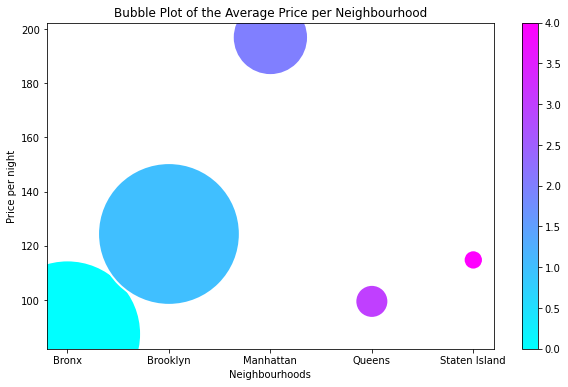

In [ ]:
df_means_per_group =  df_clean.groupby(['neighbourhood_group']).agg(
    {'price': ['mean']
    }
).reset_index() # means per neighbourhood group 

df_means_per_group['neighbourhood_group'] = pd.Categorical(df_means_per_group['neighbourhood_group'])
group_names = pd.Categorical(df_means_per_group['neighbourhood_group']).copy()
cat_codes = group_names.codes
cat_codes
avg_price_per_group = df_means_per_group[['price']].copy() # average price for each nbhd group


plt.figure(figsize = (10, 6))
plt.scatter(
    x = df_means_per_group['neighbourhood_group'], 
    y = avg_price_per_group, 
    s = df_clean['neighbourhood_group'].value_counts(), 
    c = cat_codes, 
    cmap = 'cool', 
    edgecolors = "white", 
    linewidth = 2);

plt.title("Bubble Plot of the Average Price per Neighbourhood")
plt.xlabel("Neighbourhoods")
plt.ylabel("Price per night");
plt.colorbar()
plt.show()

In [ ]:
kmode = KModes(n_clusters = 5, init = "Huang", n_init = 10, verbose = 1)
kmodes_clusters = kmode.fit_predict(X)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 14787, cost: 315197.0
Run 1, iteration: 2/100, moves: 5, cost: 315197.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 6121, cost: 319720.0
Run 2, iteration: 2/100, moves: 2, cost: 319720.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 15456, cost: 314826.0
Run 3, iteration: 2/100, moves: 1586, cost: 314823.0
Run 3, iteration: 3/100, moves: 0, cost: 314823.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 12425, cost: 312905.0
Run 4, iteration: 2/100, moves: 3, cost: 312905.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 11678, cost: 312425.0
Run 5, iteration: 2/100, moves: 8861, cost: 310299.0
Run 5, iteration: 3/100, 

In [ ]:
df_categorical['cluster_kmodes'] = kmodes_clusters
df_categorical.head()

neighbourhood_group  neighbourhood  ...  availability_365  cluster_kmodes
0                    1            108  ...               365               0
1                    2            127  ...               355               1
2                    2             94  ...               365               1
3                    1             41  ...               194               2
4                    2             61  ...                 0               4

[5 rows x 11 columns]

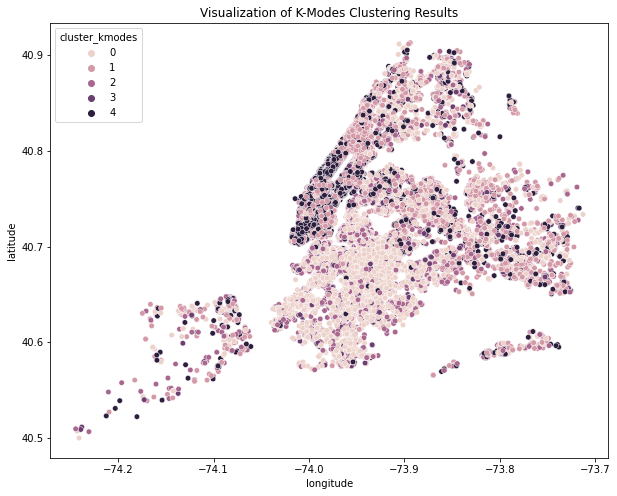

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x = 'longitude', y = 'latitude', hue = 'cluster_kmodes', s = 30, data = df_categorical)
plt.title('Visualization of K-Modes Clustering Results')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters = 5, random_state=0)

In [ ]:
kmeans_clusters = k_means.fit_predict(X)

In [ ]:
kmeans_clusters

array([2, 0, 1, ..., 0, 1, 1], dtype=int32)

In [ ]:
df_categorical['cluster_kmeans'] = kmeans_clusters

In [ ]:
df_categorical.head()

neighbourhood_group  neighbourhood  ...  cluster_kmodes  cluster_kmeans
0                    1            108  ...               0               2
1                    2            127  ...               1               0
2                    2             94  ...               1               1
3                    1             41  ...               2               2
4                    2             61  ...               4               0

[5 rows x 12 columns]

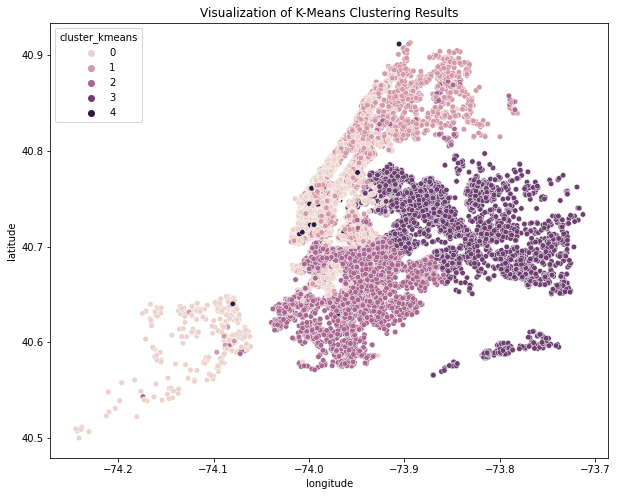

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x = 'longitude', y = 'latitude', hue = 'cluster_kmeans', s = 30, data = df_categorical)
plt.title('Visualization of K-Means Clustering Results')
plt.show()

In [ ]:
cluster_labels = df_categorical[['cluster_kmodes', 'cluster_kmeans']]
cluster_labels

cluster_kmodes  cluster_kmeans
0                   0               2
1                   1               0
2                   1               1
3                   2               2
4                   4               0
...               ...             ...
48890               0               2
48891               0               2
48892               1               0
48893               1               1
48894               1               1

[48895 rows x 2 columns]

In [ ]:
df_unscaled = df_unscaled.assign(cluster_kmodes = cluster_labels['cluster_kmodes'], 
                                 cluster_kmeans = cluster_labels['cluster_kmeans'])

In [ ]:
df_unscaled

neighbourhood_group       neighbourhood  ...  cluster_kmodes  cluster_kmeans
0                Brooklyn          Kensington  ...               0               2
1               Manhattan             Midtown  ...               1               0
2               Manhattan              Harlem  ...               1               1
3                Brooklyn        Clinton Hill  ...               2               2
4               Manhattan         East Harlem  ...               4               0
...                   ...                 ...  ...             ...             ...
48890            Brooklyn  Bedford-Stuyvesant  ...               0               2
48891            Brooklyn            Bushwick  ...               0               2
48892           Manhattan              Harlem  ...               1               0
48893           Manhattan      Hell's Kitchen  ...               1               1
48894           Manhattan      Hell's Kitchen  ...               1               1

[48895 rows x 12 columns]

In [ ]:
cluster_0 = df_unscaled.loc[df_unscaled['cluster_kmeans'] == 0]
cluster_1 = df_unscaled.loc[df_unscaled['cluster_kmeans'] == 1]
cluster_2 = df_unscaled.loc[df_unscaled['cluster_kmeans'] == 2]
cluster_3 = df_unscaled.loc[df_unscaled['cluster_kmeans'] == 3]
cluster_4 = df_unscaled.loc[df_unscaled['cluster_kmeans'] == 4]

In [ ]:
cluster_0[['neighbourhood_group', 'room_type', 'cluster_kmeans']].head()
cluster_0['neighbourhood_group'].value_counts()
#cluster_0['neighbourhood'].value_counts()
#cluster_0['room_type'].value_counts()

Manhattan        12612
Brooklyn          3586
Staten Island      351
Queens             280
Bronx               65
Name: neighbourhood_group, dtype: int64

In [ ]:
cluster_1[['neighbourhood_group', 'room_type', 'cluster_kmeans']].head()
cluster_1['neighbourhood_group'].value_counts()
#cluster_1['neighbourhood'].value_counts()
#cluster_1['room_type'].value_counts()

Manhattan        8274
Brooklyn         2483
Bronx             920
Queens             86
Staten Island       9
Name: neighbourhood_group, dtype: int64

In [ ]:
cluster_2[['neighbourhood_group', 'room_type', 'cluster_kmeans']].head()
cluster_2['neighbourhood_group'].value_counts()
#cluster_2['neighbourhood'].value_counts()
#cluster_2['room_type'].value_counts()

Brooklyn         14014
Bronx              105
Manhattan           99
Staten Island       12
Name: neighbourhood_group, dtype: int64

In [ ]:
cluster_3[['neighbourhood_group', 'room_type', 'cluster_kmeans']].tail()
cluster_3['neighbourhood_group'].value_counts()
#cluster_3['neighbourhood'].value_counts()
#cluster_3['room_type'].value_counts()

Queens    5296
Name: neighbourhood_group, dtype: int64

In [ ]:
cluster_4[['neighbourhood_group', 'room_type', 'cluster_kmeans']].tail()
cluster_4['neighbourhood_group'].value_counts()
#cluster_4['neighbourhood'].value_counts()
#cluster_4['room_type'].value_counts()

Manhattan        676
Brooklyn          21
Queens             4
Staten Island      1
Bronx              1
Name: neighbourhood_group, dtype: int64

<function matplotlib.pyplot.show>

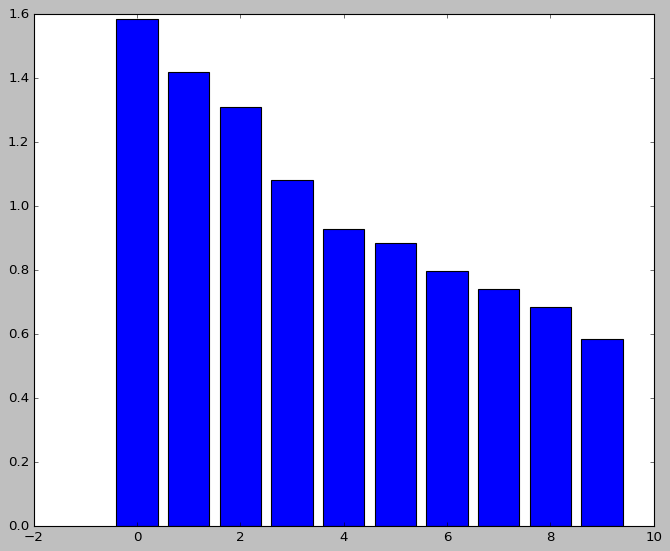

In [ ]:
from sklearn.decomposition import PCA
## let's see if PCA helps with our clustering results
pca = PCA(n_components=10)
pca.fit(X)

plt.figure(figsize = (10,8))
plt.bar(range(pca.n_components), pca.explained_variance_)
plt.show

In [ ]:
pca_ = PCA(n_components=2)
pca_2 = pca_.fit_transform(X)
pca_2.shape
pc_df = pd.DataFrame(pca_2, columns=['pc1', 'pc2'])

In [ ]:
pc_df.shape

(48895, 2)

In [ ]:
kmeans_pca = KMeans(n_clusters=5, random_state=0)
pca_clusters = kmeans_pca.fit_predict(pc_df)
df_categorical['cluster_PCA'] = pca_clusters

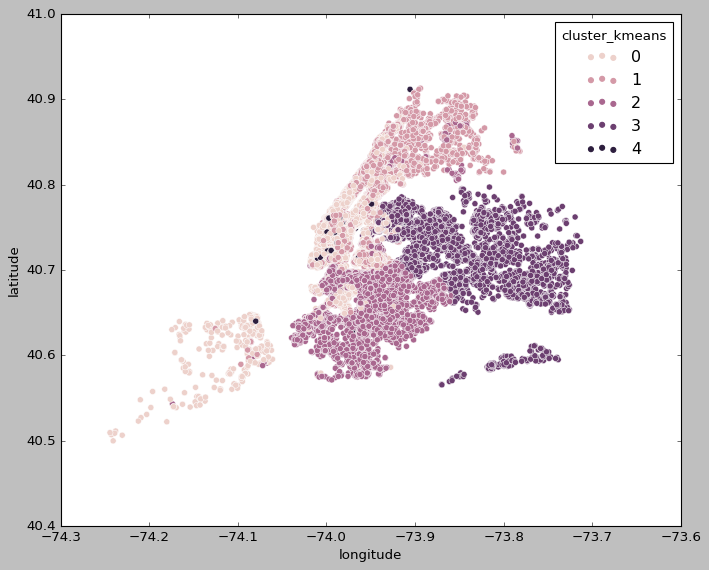

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x = 'longitude', y = 'latitude', hue = 'cluster_kmeans', s = 30, data = df_categorical)

## Price Ranges for Each Room Type

In [ ]:
df_homeapt = df[(df['room_type'] == 'Entire home/apt')]
conditions = [  # if else basically
    (df_homeapt['price'] < np.quantile(df_homeapt.price,.25)), # low
    (df_homeapt['price'] >= np.quantile(df_homeapt.price,.25)) & (df_homeapt['price'] <= np.quantile(df_homeapt.price,.75)), # medium
    (df_homeapt['price'] > np.quantile(df_homeapt.price,.75)) # high
    ]
values = ['low', 'medium', 'high']

## true labels for our training data

df_homeapt = df_homeapt.assign(price_range = np.select(conditions, values))
df_homeapt.head()

id  ... price_range
1  2595  ...      medium
3  3831  ...         low
4  5022  ...         low
5  5099  ...      medium
9  5238  ...      medium

[5 rows x 17 columns]

In [ ]:
df_private = df[(df['room_type'] == 'Private room')]
conditions = [  # if else basically
    (df_private['price'] < np.quantile(df_private.price,.25)), # low
    (df_private['price'] >= np.quantile(df_private.price,.25)) & (df_private['price'] <= np.quantile(df_private.price,.75)), # medium
    (df_private['price'] > np.quantile(df_private.price,.75)) # high
    ]
values = ['low', 'medium', 'high']

## true labels for our training data
df_private = df_private.assign(price_range = np.select(conditions, values))
df_private

id  ... price_range
0          2539  ...        high
2          3647  ...        high
6          5121  ...      medium
7          5178  ...      medium
8          5203  ...      medium
...         ...  ...         ...
48888  36484087  ...        high
48889  36484363  ...      medium
48890  36484665  ...      medium
48891  36485057  ...         low
48894  36487245  ...      medium

[22326 rows x 17 columns]

In [ ]:
df_shared = df[(df['room_type'] == 'Shared room')]
conditions = [  # if else basically
    (df_shared['price'] < np.quantile(df_shared.price,.25)), # low
    (df_shared['price'] >= np.quantile(df_shared.price,.25)) & (df_shared['price'] <= np.quantile(df_shared.price,.75)), # medium
    (df_shared['price'] > np.quantile(df_shared.price,.75)) # high
    ]
values = ['low', 'medium', 'high']

## true labels for our training data
df_shared = df_shared.assign(price_range = np.select(conditions, values))
df_shared

id  ... price_range
39        12048  ...      medium
203       54453  ...        high
357       99070  ...      medium
492      173072  ...      medium
545      200645  ...        high
...         ...  ...         ...
48832  36450814  ...         low
48855  36456829  ...      medium
48867  36473044  ...         low
48868  36473253  ...         low
48893  36485609  ...      medium

[1160 rows x 17 columns]

In [ ]:
df = pd.concat([df_homeapt, df_private, df_shared])
df

id  ... price_range
1          2595  ...      medium
3          3831  ...         low
4          5022  ...         low
5          5099  ...      medium
9          5238  ...      medium
...         ...  ...         ...
48832  36450814  ...         low
48855  36456829  ...      medium
48867  36473044  ...         low
48868  36473253  ...         low
48893  36485609  ...      medium

[48895 rows x 17 columns]

In [ ]:
df["combined"] = df['name'] + ' ' + df['host_name'] + ' ' + df['neighbourhood_group']+ ' ' + df['neighbourhood']+ ' ' + df['room_type']+ ' ' + df['price_range'] + ' '
df['combined'] = df['combined'].fillna("")
df['price_diff'] = round(df['price'] - df['price'].mean(),2)

In [ ]:
df.columns
print(len(df.columns)) ## print the number of features we have in the dataframe

19


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 1 to 48893
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.room_type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [ ]:
df.shape

(48895, 19)

# AIRBNB QUOTE SYSTEM

Quote system based on neighbourhood group and room type

In [ ]:
df_quota = df[["price", "neighbourhood_group", "room_type", "minimum_nights"]]

### Using MLR

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
## Using only neighbourhood group and room type to determine price
Y = df_quota['price']
X1 = df_quota[["neighbourhood_group","room_type",'minimum_nights']]
X = pd.get_dummies(X1) # turn categorical into dummy variables

In [ ]:
import xgboost as xgb
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 40)
regr = linear_model.LinearRegression()
xgb_reg = xgb.XGBRegressor()
regr.fit(X_train, Y_train)
xgb_reg.fit(X_train, Y_train)
predict_y = regr.predict(X_test)

# NOTE: has to be in len 8 array instead of strings because it is fitted with dummy variables
regr.predict(np.array([10,0,0,1,0,0,1,0,0]).reshape(1,-1)) # new data (interpreted as min # of nights,Manhattan, Entire home/apt)


[08:14:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([242.84406644])

In [ ]:
regr.score(X_test,Y_test)
xgb_reg.score(X_test,Y_test)

0.06309239021593294

In [ ]:
new_X = df.drop(columns=['price','name','host_id',"id","host_name","combined","price_range",'neighbourhood','price_diff','last_review','latitude','longitude'])
new_X = pd.get_dummies(new_X) # turn categorical into dummy variables
new_Y = df['price']

### XGBoost with Feature Selection

[08:14:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


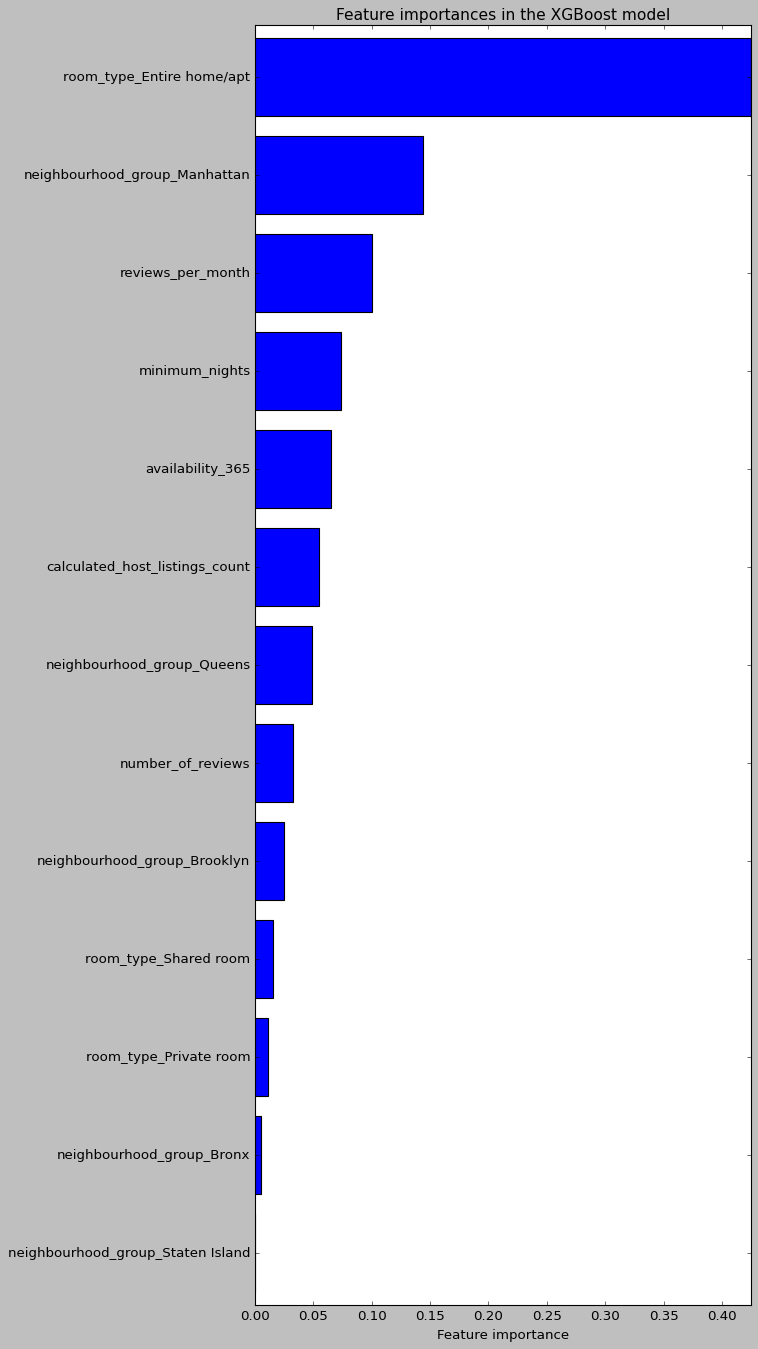

In [ ]:
import xgboost as xgb

X_train, X_test, Y_train, Y_test = train_test_split(new_X, new_Y, test_size = .20, random_state = 40)

xgb_reg = xgb.XGBRegressor()
linreg = linear_model.LinearRegression()
xgb_reg.fit(X_train, Y_train)


# Producing a dataframe of feature importances
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)

# Plotting feature importances
plt.figure(figsize=(8,20))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

### The most important features in determining price is whether the room is a home/apartment, in Manhattan, and the minimum number of nights.

In [ ]:
xgb_reg.score(X_test,Y_test)


0.13117613350965518

## PRICE PREDICTION FUNCTION (QUOTE)

In [ ]:
def predict_price(minimum_nights,neighbourhood_group,room_type): # function to get quote
  
  # if else statements
  # brute force because dummy variables make it hard to predict using categorical variables

  a = np.zeros(shape=(1,8))  
  if neighbourhood_group == 'Manhattan':
    a[:,2] = 1
  elif neighbourhood_group == 'Brooklyn':
    a[:,1] = 1
  elif neighbourhood_group == 'Bronx':
    a[:,0] = 1
  elif neighbourhood_group == 'Queens':
    a[:,3] = 1
  elif neighbourhood_group == 'Staten Island':
    a[:,4] = 1
  else:
    print("Error: Invalid Neighbourhood Group")

  if room_type == 'Entire home/apt':
    a[:,5] = 1
  elif room_type == 'Private room':
    a[:,6] = 1
  elif room_type == 'Shared room':
    a[:,7] = 1
  else:
    print("Error: Invalid Room Type")
  a = np.insert(a, 0, minimum_nights)
  a = a.reshape(1, -1)
  predicted_price = regr.predict(a)
  return predicted_price

predict_price(20,'Manhattan','Entire home/apt') # inputting neighbourhood group and room type


array([245.66700405])

## RECOMMENDATION SYSTEM

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import folium
tfv = TfidfVectorizer(min_df = 3, max_features = None, analyzer = 'word', token_pattern = 'r\w{1,}', 
                      ngram_range = (1,3), stop_words = 'english')

Using shared room for example since smaller dataset

In [ ]:
np.random.seed(10)
df_sample = df.sample(n=10000)
df_shared = df[(df['room_type'] == 'Shared room')]
df_homeapt = df[(df['room_type'] == 'Entire home/apt')]
df_private = df[(df['room_type'] == 'Private room')]   
df_shared.reset_index(drop=True,inplace=True)
df_homeapt.reset_index(drop=True,inplace=True)
df_private.reset_index(drop=True,inplace=True)

In [ ]:
df_sample.reset_index(drop=True,inplace=True)
df_sample.head()

id  ... price_diff
0  35429053  ...      46.28
1   2137796  ...      17.28
2  34944130  ...     -52.72
3  21853347  ...     112.28
4  20204751  ...     746.28

[5 rows x 19 columns]

In [ ]:
tfv_matrix = tfv.fit_transform(df_sample['combined'])
from sklearn.metrics.pairwise import sigmoid_kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)
sig[0]
indices = pd.Series(df_sample.index,index = df_sample['name']).drop_duplicates()

## RECOMMENDATION SYSTEM FUNCTION

In [ ]:
def recommend(name,sig=sig):
    previous_airbnb = df_sample[df_sample['name'] == name]
    idx = indices[name]
    sig_scores = list(enumerate(sig[idx]))
    sig_scores = sorted(sig_scores,key = lambda x:x[1], reverse = True)
    sig_scores = sig_scores[1:11]
    bnb_indices = [i[0] for i in sig_scores]
    map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)
    for i in range(0,len(df_sample.iloc[bnb_indices])):
        html=f"""
            <h3> {df_sample.iloc[bnb_indices].iloc[i]['name']}</h3>
            <h5>{df_sample.iloc[bnb_indices].iloc[i]['neighbourhood_group']}, {df_sample.iloc[bnb_indices].iloc[i]['neighbourhood']}</h5>
            <p><b>${df_sample.iloc[bnb_indices].iloc[i]['price_diff']} From Mean Price</b></p>
            <ul>
                <li>Type: {df_sample.iloc[bnb_indices].iloc[i]['room_type']}</li>
                <li>Price: ${df_sample.iloc[bnb_indices].iloc[i]['price']}</li>
                <li># of Reviews: {df_sample.iloc[bnb_indices].iloc[i]['number_of_reviews']}</li>
                <li>Min. Nights: {df_sample.iloc[bnb_indices].iloc[i]['minimum_nights']}</li>
            </ul>
            </p>
            <p>Host - {df_sample.iloc[bnb_indices].iloc[i]['host_name']} ({df_sample.iloc[bnb_indices].iloc[i]['host_id']})</p>
            """
        iframe = folium.IFrame(html=html, width=200, height=200)
        popup = folium.Popup(iframe, max_width=2650)
        folium.Marker(
            location=[df_sample.iloc[bnb_indices].iloc[i]['latitude'], df_sample.iloc[bnb_indices].iloc[i]['longitude']],
            popup=popup
        ).add_to(map)


    folium.Marker([previous_airbnb.iloc[0]['latitude'],previous_airbnb.iloc[0]['longitude']],
                  popup = f"""
            <h3> {previous_airbnb.iloc[0]['name']}</h3>
            <h5>(Previous Stay)</h5>
            """,
                  icon=folium.Icon(color='black',icon_color='#FFFF00'),).add_to(map)

    return map

In [ ]:
recommend('A Beautiful Brownstone')

#d = {'name': name, 'lat': lat, 'lng': lng, 'room_type': room_type, 'price': price, 'host': host}
#df_recommended = pd.DataFrame(data=d)
#df_recommended

In [ ]:
#recommended_map = recommend(UserInput)
#recommended_map.save('recommended_map.html')

In [ ]:
!pip install plotly --upgrade
import plotly.express as px

Requirement already up-to-date: plotly in /usr/local/lib/python3.7/dist-packages (4.14.3)


## Private Rooms Scatter Map

In [ ]:
fig = px.scatter_mapbox(df_private, lat="latitude", lon="longitude",
                        color="price", zoom=10, opacity=0.5, center=dict(lon=-73.8060,lat=40.7128),
                        size = "price",
                        color_continuous_scale=px.colors.sequential.Viridis,
                        hover_data={'latitude': False,
                                    'longitude': False,
                                    'price': True},
                        title='AirBnB - Private Room Prices in New York (2019)')
                                    
fig.update_layout(mapbox_style="carto-positron")
fig.show()

## Shared Rooms Scatter Map

In [ ]:
fig = px.scatter_mapbox(df_shared, lat="latitude", lon="longitude",
                        color="price", zoom=10, opacity=0.5, center=dict(lon=-73.8060,lat=40.7128),
                        size = "price",
                        color_continuous_scale=px.colors.sequential.Viridis,
                        hover_data={'latitude': False,
                                    'longitude': False,
                                    'price': True},
                        title='AirBnB - Shared Room Prices in New York (2019)')
                                    
fig.update_layout(mapbox_style="carto-positron")
fig.show()

## Home/Apartments Scatter Map

In [ ]:
fig = px.scatter_mapbox(df_homeapt, lat="latitude", lon="longitude",
                        color="price", zoom=10, opacity=0.3, center=dict(lon=-73.8060,lat=40.7128),
                        size = "price",
                        color_continuous_scale=px.colors.sequential.Viridis,
                        hover_data={'latitude': False,
                                    'longitude': False,
                                    'price': True},
                        title='AirBnB - Home/Apartment Room Prices in New York (2019)')
                                    
fig.update_layout(mapbox_style="carto-positron")
fig.show()

# Clustering (K-modes)

In [ ]:
#!pip install kmodes

import numpy as np
from kmodes.kmodes import KModes
from sklearn import preprocessing

data = df.filter(['neighbourhood_group','neighbourhood','room_type','price_range'])

#Process the categories into numbers
LE = preprocessing.LabelEncoder()
skdata = data.apply(LE.fit_transform)
skdata.head()

neighbourhood_group  neighbourhood  room_type  price_range
1                    2            127          0            2
3                    1             41          0            1
4                    2             61          0            1
5                    2            137          0            2
9                    2             35          0            2

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 118591.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 98955.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 14136, cost: 82103.0
Run 1, iteration: 2/100, moves: 1022, cost: 82103.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1293, cost: 81295.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2033, cost: 77867.0
Run 1, iteration: 2/100, moves: 235, cost: 77867.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 9750, cost: 70382.0
Run 1, iteration: 2/100, moves: 2596, cost: 69353.0
Run 1, iteration: 3/100, moves: 527, cost: 69353.0
Init: 

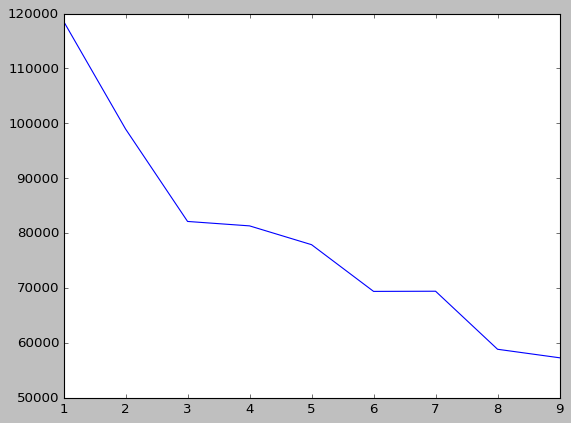

In [ ]:
#Choose K
#k = 4 or 6 or 8
cost = []
for num_clusters in list(range(1,10)):
    kmode = KModes(n_clusters=num_clusters, init = "Huang", n_init = 1, verbose=1)
    kmode.fit_predict(skdata)
    cost.append(kmode.cost_)

y = np.array([i for i in range(1,10,1)])
plt.plot(y,cost)

In [ ]:
#fit k-modes

kmode = KModes(n_clusters=6, init = "Huang", n_init = 10, verbose=1)
skdata_fit = kmode.fit_predict(skdata)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 11870, cost: 75395.0
Run 1, iteration: 2/100, moves: 5524, cost: 73981.0
Run 1, iteration: 3/100, moves: 25, cost: 73981.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 10715, cost: 71309.0
Run 2, iteration: 2/100, moves: 1458, cost: 71309.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 16011, cost: 66770.0
Run 3, iteration: 2/100, moves: 2651, cost: 66770.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 9885, cost: 73329.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 14101, cost: 69088.0
Run 5, iteration: 2/100, moves: 443, cost: 69088.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...

In [ ]:
#Combine the preidicted cluster to the df

clusters_skdata = pd.DataFrame(skdata_fit)
clusters_skdata.columns = ['cluster_predicted']
combined_skdata = pd.concat([skdata, clusters_skdata], axis = 1).reset_index()
combined_skdata = combined_skdata.drop(['index'], axis = 1)

combined_skdata.head()

neighbourhood_group  neighbourhood  ...  price_range  cluster_predicted
0                    1            108  ...            0                  0
1                    2            127  ...            2                  1
2                    2             94  ...            0                  3
3                    1             41  ...            1                  0
4                    2             61  ...            1                  0

[5 rows x 5 columns]

In [ ]:
from sklearn.decomposition import FactorAnalysis

#apply factor analysis to reduce the dimension
transformer = FactorAnalysis(n_components=2, random_state=0)
skdata_transformed = transformer.fit_transform(skdata)


#combine the cluster prediction with the decomposed data
skdata_com_transformed = pd.concat([pd.DataFrame(skdata_transformed[:,0], columns=['X1']),
                                    pd.DataFrame(skdata_transformed[:,1], columns=['X2']),
                                    combined_skdata.filter(['cluster_predicted'])], axis = 1)
skdata_com_transformed.head()

X1        X2  cluster_predicted
0  0.289140 -0.178194                  0
1 -0.961790  0.068998                  1
2 -0.670848  0.260662                  3
3  0.434595 -0.183402                  0
4 -1.049042 -0.130276                  0

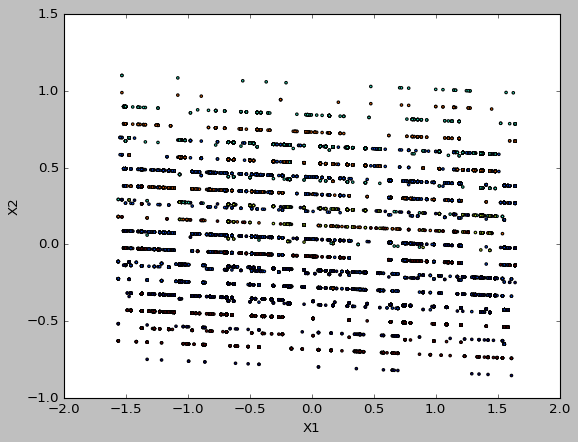

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(skdata_com_transformed['X1'],skdata_com_transformed['X2'], c=skdata_com_transformed['cluster_predicted'], s=5)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()